In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil
symbol = "ZYDUSWELL"
symbol1 = "ZYDUSWELL"
# Reading CSV file into training set
data_set = pd.read_csv('companyStocks/'+symbol+'.csv')
data_set_test = pd.read_csv('companyStockValidation/'+symbol1+'.csv')
training_set = data_set
training_set.head()

,Date,Open,High,Low,Close
0,13-Nov-2009,219.95,223.4,196.25,200.55
1,16-Nov-2009,204.70,205.8,195.10,196.60
2,17-Nov-2009,197.70,215.0,196.10,210.65
3,18-Nov-2009,209.70,214.0,206.00,207.05
4,19-Nov-2009,207.70,212.8,202.00,203.00


In [2]:
test_set = data_set_test
test_set.head()

,Date,Open,High,Low,Close
0,01-Jan-2018,1051.00,1059.9,1030.00,1041.80
1,02-Jan-2018,1065.00,1065.0,999.15,1017.35
2,03-Jan-2018,1029.85,1037.0,1016.25,1022.00
3,04-Jan-2018,1029.90,1039.0,986.55,1003.05
4,05-Jan-2018,1004.85,1050.0,1000.00,1033.95


In [3]:
# Getting relevant feature
training_set = training_set.iloc[:,4:]
training_set.head()

,Close
0,200.55
1,196.60
2,210.65
3,207.05
4,203.00


In [4]:
# Converting to 2D array
training_set = training_set.values
training_set

array([[ 200.55],
       [ 196.6 ],
       [ 210.65],
       ...,
       [1103.85],
       [1090.  ],
       [1055.15]])

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set


array([[0.00418521],
       [0.        ],
       [0.01488663],
       ...,
       [0.96127357],
       [0.94659886],
       [0.90967366]])

In [6]:
# Getting the inputs and the ouputs

X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
print("X:",X_train)
print("y:",y_train)
# Example
today = pd.DataFrame(X_train[0:5])
tomorrow = pd.DataFrame(y_train[0:5])
ex = pd.concat([today, tomorrow], axis=1)
ex.columns = (['today', 'tomorrow'])
ex

X: [[0.00418521]
 [0.        ]
 [0.01488663]
 ...
 [0.94961856]
 [0.96127357]
 [0.94659886]]
y: [[0.        ]
 [0.01488663]
 [0.01107226]
 ...
 [0.96127357]
 [0.94659886]
 [0.90967366]]


,today,tomorrow
0,0.004185,0.000000
1,0.000000,0.014887
2,0.014887,0.011072
3,0.011072,0.006781
4,0.006781,0.020926


In [7]:
# Reshaping into required shape for Keras
X_train = np.reshape(X_train, (len(X_train), 1, 1))
X_train

array([[[0.00418521]],

       [[0.        ]],

       [[0.01488663]],

       ...,

       [[0.94961856]],

       [[0.96127357]],

       [[0.94659886]]])

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

/Users/mshegde/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
regressor = Sequential()

In [10]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'relu', input_shape = (None, 1)))

In [11]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [12]:
# Compiling the Recurrent Neural Network
regressor.compile(optimizer = 'Nadam', loss = 'mean_squared_error')

In [13]:
# Fitting the Recurrent Neural Network to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
2041/2041 [==============================] - 1s 281us/step - loss: 0.1740
Epoch 2/200
2041/2041 [==============================] - 0s 177us/step - loss: 0.0648
Epoch 3/200
2041/2041 [==============================] - 0s 175us/step - loss: 0.0211
Epoch 4/200
2041/2041 [==============================] - 0s 177us/step - loss: 0.0148
Epoch 5/200
2041/2041 [==============================] - 0s 186us/step - loss: 0.0123
Epoch 6/200
2041/2041 [==============================] - 0s 186us/step - loss: 0.0098
Epoch 7/200
2041/2041 [==============================] - 0s 173us/step - loss: 0.0074
Epoch 8/200
2041/2041 [==============================] - 0s 177us/step - loss: 0.0053
Epoch 9/200
2041/2041 [==============================] - 0s 175us/step - loss: 0.0036
Epoch 10/200
2041/2041 [==============================] - 0s 175us/step - loss: 0.0024
Epoch 11/200
2041/2041 [==============================] - 0s 173us/step - loss: 0.0015
Epoch 12/200
2041/2041 [============================

2041/2041 [==============================] - 0s 174us/step - loss: 1.8943e-04
Epoch 92/200
2041/2041 [==============================] - 0s 173us/step - loss: 1.9089e-04
Epoch 93/200
2041/2041 [==============================] - 0s 173us/step - loss: 1.8927e-04
Epoch 94/200
2041/2041 [==============================] - 0s 174us/step - loss: 1.9027e-04
Epoch 95/200
2041/2041 [==============================] - 0s 174us/step - loss: 1.8806e-04
Epoch 96/200
2041/2041 [==============================] - 0s 176us/step - loss: 1.8873e-04
Epoch 97/200
2041/2041 [==============================] - 0s 172us/step - loss: 1.8817e-04
Epoch 98/200
2041/2041 [==============================] - 0s 172us/step - loss: 1.8820e-04
Epoch 99/200
2041/2041 [==============================] - 0s 175us/step - loss: 1.8815e-04
Epoch 100/200
2041/2041 [==============================] - 0s 173us/step - loss: 1.8744e-04
Epoch 101/200
2041/2041 [==============================] - 0s 173us/step - loss: 1.8720e-04
Epoch 102/

2041/2041 [==============================] - 0s 176us/step - loss: 1.8875e-04
Epoch 181/200
2041/2041 [==============================] - 0s 171us/step - loss: 1.8848e-04
Epoch 182/200
2041/2041 [==============================] - 0s 171us/step - loss: 1.8851e-04
Epoch 183/200
2041/2041 [==============================] - 0s 171us/step - loss: 1.8714e-04
Epoch 184/200
2041/2041 [==============================] - 0s 173us/step - loss: 1.8827e-04
Epoch 185/200
2041/2041 [==============================] - 0s 172us/step - loss: 1.8792e-04
Epoch 186/200
2041/2041 [==============================] - 0s 172us/step - loss: 1.8710e-04
Epoch 187/200
2041/2041 [==============================] - 0s 173us/step - loss: 1.8664e-04
Epoch 188/200
2041/2041 [==============================] - 0s 175us/step - loss: 1.8795e-04
Epoch 189/200
2041/2041 [==============================] - 0s 172us/step - loss: 1.8657e-04
Epoch 190/200
2041/2041 [==============================] - 0s 172us/step - loss: 1.8909e-04
Ep

In [14]:
# Getting relevant feature
real_stock_price = test_set.iloc[:,4:]
real_stock_price_dates = test_set.iloc[:,0]
#real_stock_price.append([0])

real_stock_price.tail()

,Close
66,1202.15
67,1202.40
68,1196.25
69,1182.20
70,1202.35


In [15]:
# Converting to 2D array
real_stock_price = real_stock_price.values
# b = np.array([[0]])
# real_stock_price = np.append(real_stock_price,b)
real_stock_price = np.reshape(real_stock_price,(len(real_stock_price),-1))
print(real_stock_price)
print(type(real_stock_price))

[[1041.8 ]
 [1017.35]
 [1022.  ]
 [1003.05]
 [1033.95]
 [1040.15]
 [1046.5 ]
 [1091.75]
 [1133.1 ]
 [1134.15]
 [1117.55]
 [1105.85]
 [1140.4 ]
 [1112.  ]
 [1103.4 ]
 [1092.85]
 [1103.85]
 [1090.  ]
 [1055.15]
 [1025.15]
 [1008.45]
 [ 998.  ]
 [1007.65]
 [ 988.25]
 [ 976.85]
 [ 971.9 ]
 [1052.95]
 [1146.9 ]
 [1147.2 ]
 [1133.95]
 [1179.45]
 [1179.05]
 [1171.35]
 [1180.5 ]
 [1259.65]
 [1243.2 ]
 [1252.7 ]
 [1250.8 ]
 [1240.05]
 [1268.7 ]
 [1251.25]
 [1295.7 ]
 [1266.55]
 [1275.7 ]
 [1250.05]
 [1223.4 ]
 [1255.25]
 [1263.45]
 [1248.8 ]
 [1241.7 ]
 [1231.75]
 [1225.2 ]
 [1200.8 ]
 [1203.7 ]
 [1184.  ]
 [1170.8 ]
 [1143.4 ]
 [1164.05]
 [1155.2 ]
 [1177.55]
 [1215.45]
 [1239.85]
 [1186.8 ]
 [1208.3 ]
 [1203.  ]
 [1211.9 ]
 [1202.15]
 [1202.4 ]
 [1196.25]
 [1182.2 ]
 [1202.35]]
<class 'numpy.ndarray'>


In [16]:
inputs = real_stock_price
print(type(inputs))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(real_stock_price), 1, 1))
print(inputs)
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(type(predicted_stock_price[-1]))
inputTest = predicted_stock_price[-1]
inputTest = np.reshape(inputTest,(len(inputTest),-1))
inputTest = sc.transform(inputTest)
inputTest = np.reshape(inputTest, (len(inputTest), -1, 1))
predicted_stock_price_test = regressor.predict(inputTest)
predicted_stock_price_test = sc.inverse_transform(predicted_stock_price_test)
print(predicted_stock_price_test)

<class 'numpy.ndarray'>
[[[0.89552871]]

 [[0.8696228 ]]

 [[0.87454969]]

 [[0.85447129]]

 [[0.88721127]]

 [[0.89378046]]

 [[0.90050858]]

 [[0.94845306]]

 [[0.99226531]]

 [[0.99337783]]

 [[0.97578936]]

 [[0.96339267]]

 [[1.        ]]

 [[0.96990888]]

 [[0.96079678]]

 [[0.94961856]]

 [[0.96127357]]

 [[0.94659886]]

 [[0.90967366]]

 [[0.87788726]]

 [[0.86019284]]

 [[0.84912058]]

 [[0.8593452 ]]

 [[0.83879   ]]

 [[0.82671117]]

 [[0.82146641]]

 [[0.90734266]]

 [[1.00688705]]

 [[1.00720492]]

 [[0.99316592]]

 [[1.04137529]]

 [[1.04095147]]

 [[1.03279296]]

 [[1.04248782]]

 [[1.12635092]]

 [[1.10892138]]

 [[1.11898707]]

 [[1.11697394]]

 [[1.10558381]]

 [[1.13593982]]

 [[1.11745073]]

 [[1.16454757]]

 [[1.13366179]]

 [[1.14335664]]

 [[1.11617928]]

 [[1.08794236]]

 [[1.12168892]]

 [[1.1303772 ]]

 [[1.11485484]]

 [[1.10733206]]

 [[1.09678957]]

 [[1.08984954]]

 [[1.06399661]]

 [[1.06706929]]

 [[1.04619623]]

 [[1.03221021]]

 [[1.00317864]]

 [[1.02

[[1041.8 ]
 [1017.35]
 [1022.  ]
 [1003.05]
 [1033.95]
 [1040.15]
 [1046.5 ]
 [1091.75]
 [1133.1 ]
 [1134.15]
 [1117.55]
 [1105.85]
 [1140.4 ]
 [1112.  ]
 [1103.4 ]
 [1092.85]
 [1103.85]
 [1090.  ]
 [1055.15]
 [1025.15]
 [1008.45]
 [ 998.  ]
 [1007.65]
 [ 988.25]
 [ 976.85]
 [ 971.9 ]
 [1052.95]
 [1146.9 ]
 [1147.2 ]
 [1133.95]
 [1179.45]
 [1179.05]
 [1171.35]
 [1180.5 ]
 [1259.65]
 [1243.2 ]
 [1252.7 ]
 [1250.8 ]
 [1240.05]
 [1268.7 ]
 [1251.25]
 [1295.7 ]
 [1266.55]
 [1275.7 ]
 [1250.05]
 [1223.4 ]
 [1255.25]
 [1263.45]
 [1248.8 ]
 [1241.7 ]
 [1231.75]
 [1225.2 ]
 [1200.8 ]
 [1203.7 ]
 [1184.  ]
 [1170.8 ]
 [1143.4 ]
 [1164.05]
 [1155.2 ]
 [1177.55]
 [1215.45]
 [1239.85]
 [1186.8 ]
 [1208.3 ]
 [1203.  ]
 [1211.9 ]
 [1202.15]
 [1202.4 ]
 [1196.25]
 [1182.2 ]
 [1202.35]]
<class 'numpy.ndarray'>


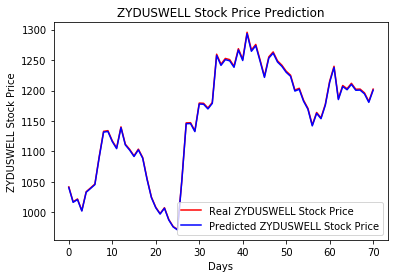

In [17]:
# Visualizing the results
print(real_stock_price)
print(type(real_stock_price))
plt.plot(real_stock_price, color = 'red', label = 'Real '+symbol+' Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted '+symbol+' Stock Price')
plt.title(symbol+' Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel(symbol+' Stock Price')
plt.legend()
plt.savefig("rnnPredictedStockImages/"+symbol+".jpg")
plt.show()


1736
2041


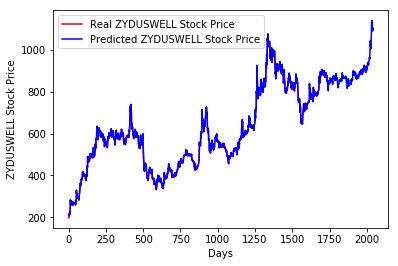

In [18]:
real_stock_price_train = pd.read_csv('CompanyStocks/'+symbol+'.csv')
real_stock_price_train = real_stock_price_train.iloc[:ceil(len(real_stock_price_train)*0.85),4:].values
print(len(real_stock_price_train))

predicted_stock_price_train = regressor.predict(X_train)
print(len(X_train))
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Real '+symbol+' Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted '+symbol+' Stock Price')
plt.xlabel('Days')
plt.ylabel(symbol+' Stock Price')
plt.legend()
plt.show()

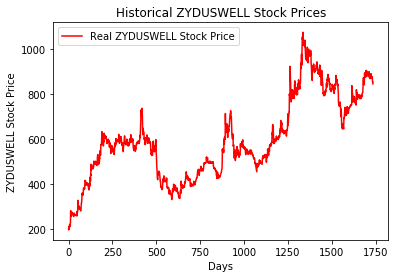

In [19]:
plt.plot(real_stock_price_train, color = 'red', label = 'Real '+symbol+' Stock Price')
plt.title('Historical '+symbol+' Stock Prices')
plt.xlabel('Days')
plt.ylabel(symbol+' Stock Price')
plt.legend()
plt.show()

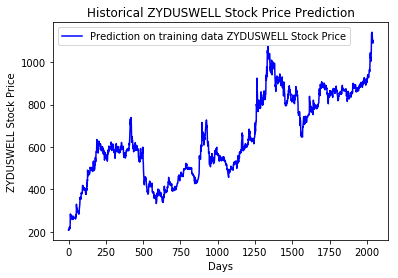

In [20]:
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Prediction on training data '+symbol+' Stock Price')
plt.title('Historical '+symbol+' Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel(symbol+' Stock Price')
plt.legend()
plt.show()

In [21]:
real_stock_price_dates = np.array(real_stock_price_dates)
real_stock_price = np.array(real_stock_price)
predicted_stock_price = np.array(predicted_stock_price)
real_stock_price_arr = []
for i in real_stock_price:
    real_stock_price_arr.extend(i)
predicted_stock_price_arr = []
for i in predicted_stock_price:
    predicted_stock_price_arr.extend(i)

real_stock_price_arr = np.array(real_stock_price_arr)
predicted_stock_price_arr = np.array(predicted_stock_price_arr)

sumOfSquares = []
difference = []
for i in range(len(predicted_stock_price_arr)):
    sumOfSquares.append((real_stock_price_arr[i]-predicted_stock_price_arr[i])**2)
    difference.append(real_stock_price_arr[i]-predicted_stock_price_arr[i])
sumOfSquares = np.array(sumOfSquares)
difference = np.array(difference)

meanSumOfSquares = sum(sumOfSquares)/len(sumOfSquares)
rootMean = meanSumOfSquares**0.5


df_sol = pd.DataFrame({'1.Date':real_stock_price_dates,'3.Predicted':predicted_stock_price_arr,'2.Actual':real_stock_price_arr,'4.Difference':difference, '5.Squared Difference':sumOfSquares, '6.Mean Squared Difference':meanSumOfSquares,'7.RMSE':rootMean})
df_sol.to_csv('RNNPredictions/Predictions_'+symbol+'.csv')